# **<font color='green'> INFLUÊNCIA DA QUALIDADE DO SONO NO STRESS E NA PRODUTIVIDADE</font>**
___
<p style='text-align:justify'>O objetivo deste projeto é analisar a influência da qualidade sono na produtividade e nos níveis de estresse do indivíduo. O conjunto de dados utilizado contém 5.000 registros e pode ser encontrado no link <a href="https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data"> https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data</a>

<p style='text-align:justify'>O sono é um dos pilares fundamentais para a saúde física e mental, influenciando diretamente o desempenho cognitivo, a regulação emocional e os níveis de estresse. Por isso, se faz necessário, em primeira análise, averiguar de que maneira a qualidade do sono exerce influência sobre as outras variáveis através de testes de <strong>Correlação</strong> e <strong>Colinearidade</strong></p>

<p style='text-align:justify'>Caso haja indícios de Correlação e/ou Colinearidade, é necessário interpretar os resultados dos testes para então se estudar como os hábitos cotidianos (tempo de sono, quantidade de café, tempo de exercício físico...) influenciam na qualidade do sono. Por fim, com esses dados, é possível tomar decisões importantes para melhorar o humor e a produtividade dos indivíduos. </p>

## **Importação dos Dados**
Display do dataset utilizado como base para as análises.

In [2]:
# Importanto Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display da Tabela
tabela = pd.read_csv("sleep_cycle_productivity.csv")
display(tabela)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


# **<font color='green'>1. APRENDENDO A FAZER HEATMAPS</font>**

<p style='text-align:justify'>Os heatmaps (mapas de calor) são ferramentas visuais extremamente úteis para analisar padrões e identificar relações entre variáveis em grandes conjuntos de dados. Eles utilizam variações de cor para representar valores numéricos, tornando mais fácil visualizar tendências, anomalias e correlações, e assim contribuem para a tomada de decisões.</p>

## **1.1 Quantidade de Ocorrências de Sleep e Productivity**

Primeiramente, vamos analisar como se comporta as associações entre sono e produtividade. Para isso, extraimos da tabela principal as colunas que temos a intenção de trabalhar, contamos quantas pessoas tem para cada combinação e organizamos isso de um jeito mais fácil de visualizar. Depois, tranformamos essa tabela em uma visualização em heatmap.

Selecionar qual parte da tabela principal vamos trabalhar

In [27]:
dados_sono_produtividade = tabela[['Sleep Quality', 'Productivity Score']]
display(dados_sono_produtividade)

,Sleep Quality,Productivity Score
0,3,8
1,5,10
2,7,10
3,8,8
4,10,8
...,...,...
4995,1,5
4996,4,5
4997,6,2
4998,9,8


Em seguida, contar quantas pessoas tem para cada combinação de Sleep Quality e Productivity Score

In [34]:
qld_p = dados_sono_produtividade[['Sleep Quality', 'Productivity Score']].sort_values('Sleep Quality').groupby('Sleep Quality').value_counts().reset_index()
display(qld_p)

,Sleep Quality,Productivity Score,count
0,1,9,66
1,1,4,54
2,1,7,54
3,1,2,49
4,1,6,48
...,...,...,...
95,10,8,53
96,10,2,52
97,10,3,43
98,10,4,43


Pivotar a tabela

In [35]:
qld_p2 = qld_p.pivot(index='Sleep Quality', columns='Productivity Score', values='count')
display(qld_p2)

Productivity Score,1,2,3,4,5,6,7,8,9,10
Sleep Quality,,,,,,,,,,
1,44,49,39,54,42,48,54,37,66,47
2,42,50,40,45,48,65,55,45,64,49
3,43,53,47,44,42,44,52,63,57,45
4,45,53,57,63,55,50,50,54,39,42
5,33,53,52,48,53,53,50,55,75,49
6,34,56,53,37,47,43,46,53,63,57
7,43,54,48,47,50,60,58,49,48,60
8,43,54,44,60,40,36,49,54,49,62
9,45,50,53,60,39,43,41,46,59,44


Produzir o heatmap com a tabela pivotada

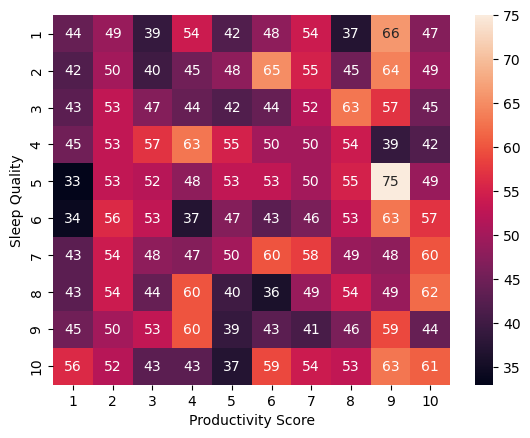

In [39]:
sns.heatmap(data=qld_p2, annot=True, fmt='.0f')
plt.savefig('Sleep_Productivity_heatmap.png')

## **1.2 Quantidade de Ocorrências de Sleep e Stress**
Agora, vamos fazer a mesma coisa com Sleep Quality e Stress Level. Extraimos da tabela principal as colunas que temos a intenção de trabalhar, contamos quantas pessoas tem para cada combinação e organizamos isso de um jeito mais fácil de visualizar. Depois, tranformamos essa tabela em uma visualização em heatmap.

Selecionar qual parte da tabela principal vamos trabalhar

In [20]:
dados_sono_stress = tabela[['Sleep Quality', 'Stress Level']]
display(dados_sono_stress)

,Sleep Quality,Stress Level
0,3,6
1,5,7
2,7,10
3,8,2
4,10,9
...,...,...
4995,1,1
4996,4,2
4997,6,1
4998,9,6


Em seguida, contar quantas pessoas tem para cada combinação de Sleep Quality e Stress Level

In [25]:
qld_s = dados_sono_stress[['Sleep Quality', 'Stress Level']].sort_values('Sleep Quality').groupby('Stress Level').value_counts().reset_index()
display(qld_s)

,Stress Level,Sleep Quality,count
0,1,7,61
1,1,10,60
2,1,2,57
3,1,5,52
4,1,8,52
...,...,...,...
95,10,1,53
96,10,4,47
97,10,2,46
98,10,6,46


Pivotar a tabela

In [41]:
qld_s2 = qld_s.pivot(index='Sleep Quality', columns='Stress Level', values='count')
display(qld_s2)

Stress Level,1,2,3,4,5,6,7,8,9,10
Sleep Quality,,,,,,,,,,
1,40,47,52,45,41,47,40,47,68,53
2,57,46,48,48,37,46,61,48,66,46
3,42,47,47,51,50,49,55,38,48,63
4,49,39,56,58,47,48,51,60,53,47
5,52,47,62,59,43,59,51,49,43,56
6,48,54,49,39,62,54,40,52,45,46
7,61,61,56,37,53,46,54,55,38,56
8,52,42,47,59,49,52,46,50,55,39
9,39,43,48,50,50,56,45,52,43,54


Produzir o heatmap com a tabela pivotada

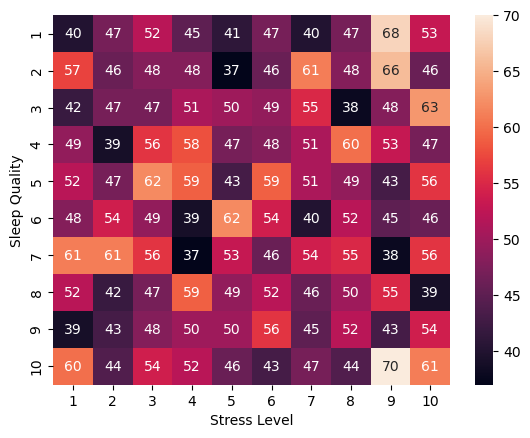

In [43]:
sns.heatmap(data=qld_s2, annot=True, fmt='.0f')
plt.savefig('Sleep_Stress_heatmap')

## **1.3 Quantidade de Ocorrências de Productivity e Stress**
Agora, por fim, o mesmo processo com Productivity Score e Stress Level. Extraimos da tabela principal as colunas que temos a intenção de trabalhar, contamos quantas pessoas tem para cada combinação e organizamos isso de um jeito mais fácil de visualizar. Depois, tranformamos essa tabela em uma visualização em heatmap.

Selecionar qual parte da tabela principal vamos trabalhar

In [16]:
dados_produtividade_stress = tabela[['Productivity Score', 'Stress Level']]
display(dados_produtividade_stress)

,Productivity Score,Stress Level
0,8,6
1,10,7
2,10,10
3,8,2
4,8,9
...,...,...
4995,5,1
4996,5,2
4997,2,1
4998,8,6


Em seguida, contar quantas pessoas tem para cada combinação de Sleep Quality e Productivity Score

In [17]:
prod_ss = dados_produtividade_stress[['Productivity Score', 'Stress Level']].sort_values(['Productivity Score', 'Stress Level']).groupby('Productivity Score').value_counts().reset_index()
display(prod_ss)

,Productivity Score,Stress Level,count
0,1,1,51
1,1,6,51
2,1,10,49
3,1,3,47
4,1,4,43
...,...,...,...
95,10,6,51
96,10,8,49
97,10,10,48
98,10,5,41


Pivotar a tabela

In [18]:
prod_ss2 = prod_ss.pivot(index='Productivity Score', columns='Stress Level', values='count')
display(prod_ss2)

Stress Level,1,2,3,4,5,6,7,8,9,10
Productivity Score,,,,,,,,,,
1,51,35,47,43,43,51,32,39,38,49
2,56,42,53,49,65,54,46,50,57,52
3,45,42,51,44,50,47,37,47,50,63
4,45,45,45,47,60,46,57,66,44,46
5,37,40,54,52,32,47,59,45,46,41
6,54,45,54,47,49,52,46,43,51,60
7,53,49,60,44,60,46,49,49,49,50
8,51,61,56,50,35,39,49,44,70,54
9,49,56,61,61,43,67,58,63,67,58


Produzir o heatmap com a tabela pivotada

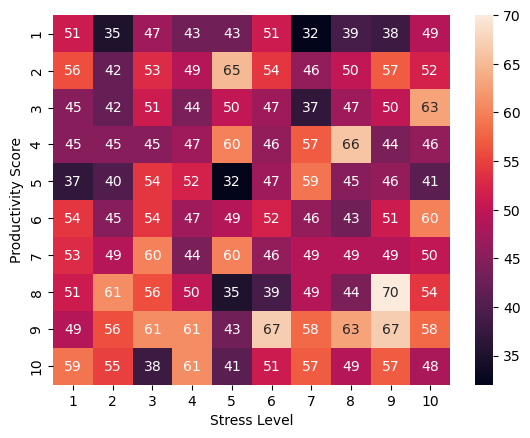

In [19]:
sns.heatmap(data=prod_ss2, annot=True, fmt='.0f')
plt.savefig('Productivity_Stress_heatmap.png')

# **<font color='green'>2. ANÁLISE DE RELAÇÃO ENTRE A QUALIDADE DO SONO E AS DEMAIS VARIÁVEIS</font>**

## **2.1 Testes de Correlação e Colinearidade**
<p style='text-align:justify'>A <strong>Correlação</strong> mede a relação entre duas variáveis, indicando se e como elas variam juntas. A correlação é geralmente medida pelo <strong>Coeficiente de Correlação de Pearson</strong>, que varia entre -1 (correlação negativa perfeita) e 1 (correlação positiva perfeita). Uma correlação é positiva quando uma variável aumenta e a outra também tende a aumentar (ex: quanto mais horas de estudo, maior a nota na prova). Na negativa, quando uma variável aumenta, a outra tende a diminuir (ex: quanto mais tempo de celular antes de dormir, pior a qualidade do sono). Já na correlação nula, não há relação entre as variáveis (ex: número de sapatos e nível de estresse).

<p style='text-align:justify'> Já a <strong>Colinearidade</strong> ocorre quando duas ou mais variáveis independentes em um modelo estatístico (como regressão linear) são altamente correlacionadas entre si e é medida pelo <strong>VIF (Variance Inflation Factor)</strong>, ou <strong>Fator de Inflação da Variância</strong>. Um VIF entre 1 e 5 indica baixa ou moderada colinearidade, entre 5 a 10 colinearidade elevada e, acima de 10, muito alta. Colinearidades altas podem ser um problema, pois dificulta a interpretação dos efeitos individuais de cada variável. Por exemplo, se um modelo prevê produtividade baseado tanto em horas de sono quanto em tempo de descanso, e essas duas variáveis estão fortemente correlacionadas, o modelo pode ter dificuldades para determinar qual delas realmente influencia o resultado. Por isso, é de fundamental importância que se analise ambos testes. </p>

### **2.1.1 Teste de Correlação**
____________________________________
**RESULTADO:** As varíaveis NÃO apresentam correlação entre si.

Primeiro, vamos criar a matriz de correlação

In [47]:
X = tabela[['Sleep Quality', 'Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
            'Productivity Score', 'Stress Level']]
matriz = X.corr()
display(matriz)

,Sleep Quality,Total Sleep Hours,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Productivity Score,Stress Level
Sleep Quality,1.000000,0.002390,0.000570,0.000669,0.002062,-0.001155,-0.014364
Total Sleep Hours,0.002390,1.000000,0.017514,0.020274,0.005732,0.018885,-0.004082
Exercise (mins/day),0.000570,0.017514,1.000000,0.015268,-0.005794,-0.024903,-0.012240
Caffeine Intake (mg),0.000669,0.020274,0.015268,1.000000,0.009154,0.005058,0.009030
Screen Time Before Bed (mins),0.002062,0.005732,-0.005794,0.009154,1.000000,0.003703,-0.000814
Productivity Score,-0.001155,0.018885,-0.024903,0.005058,0.003703,1.000000,-0.001088
Stress Level,-0.014364,-0.004082,-0.012240,0.009030,-0.000814,-0.001088,1.000000


Em seguida, tranformar para visualização em heatmap como aprendemos anteriormente.

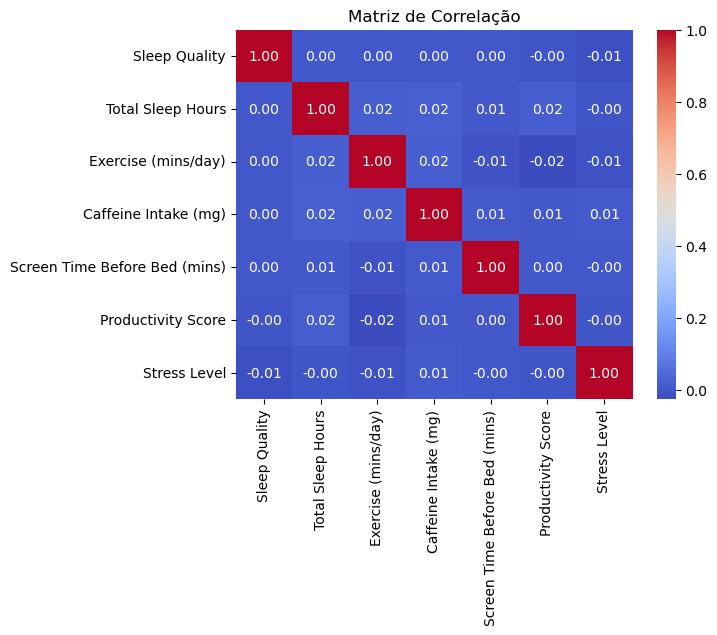

<Figure size 640x480 with 0 Axes>

In [49]:
sns.heatmap(matriz, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()
plt.savefig('correl_matriz.png')

**RESULTADO:** as varíaveis NÃO apresentam correlação entre si.

### **2.1.2 Teste de Colinearidade**
___
**RESULTADO:** As varíaveis NÃO apresentam colinearidade entre si.

Primeiro, vamos importar uma nova biblioteca e criar uma constante.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
X_vif = sm.add_constant(X)

Em seguida, calcular o VIF e mandar mostrar na tela.

In [52]:
vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

display(vif_data)

,Variável,VIF
0,const,43.326787
1,Sleep Quality,1.000218
2,Total Sleep Hours,1.001130
3,Exercise (mins/day),1.001359
4,Caffeine Intake (mg),1.000830
5,Screen Time Before Bed (mins),1.000168
6,Productivity Score,1.001035
7,Stress Level,1.000460


### **2.1.3 Normalizar valores X**
___
<p style='text-align:justify'>A normalização ajusta os valores das variáveis para que fiquem dentro de um intervalo específico, geralmente entre 0 e 1. Esse método preserva a distribuição dos dados enquanto mantém todos os valores dentro da mesma escala. Seja para melhorar o desempenho de algoritmos, acelerar treinamentos ou permitir comparações mais justas entre variáveis, aplicar técnicas de normalização ou padronização é essencial para análises precisas e eficazes. No caso do projeto, utilizaremos para melhor visualizar os valores de correlação e colinearidade, agora com os valores dentro da mesma escala. </p>

**RESULTADO:** Os valores se encontram dentro da mesma escala (entre 0 e 1)

In [207]:
from sklearn.preprocessing import MinMaxScaler

# tabela
normalizar = tabela[['Sleep Quality', 'Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
                     'Productivity Score', 'Stress Level']]
#display(normalizar)

# objeto para normalizar
obj_normalizacao = MinMaxScaler().fit(normalizar)
# aplicando a normalizacao
df_normalizado = obj_normalizacao.transform(normalizar)
# array para dataframe e nomear
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['Sleep Quality', 'Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
                          'Productivity Score', 'Stress Level']
display(df_normalizado)
df_normalizado.describe()
#tabela.describe()

,Sleep Quality,Total Sleep Hours,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Productivity Score,Stress Level
0,0.222222,0.156,0.966292,0.290970,0.648045,0.777778,0.555556
1,0.444444,0.182,0.359551,0.070234,0.491620,1.000000,0.666667
2,0.666667,0.170,0.191011,0.294314,0.329609,1.000000,1.000000
3,0.777778,0.610,0.516854,0.113712,0.446927,0.777778,0.111111
4,1.000000,0.450,0.685393,0.899666,0.525140,0.777778,0.888889
...,...,...,...,...,...,...,...
4995,0.000000,0.174,0.617978,0.722408,0.536313,0.444444,0.000000
4996,0.333333,0.682,0.786517,0.270903,0.988827,0.444444,0.111111
4997,0.555556,0.060,0.235955,0.301003,0.776536,0.111111,0.000000
4998,0.888889,0.780,0.168539,0.290970,0.899441,0.777778,0.555556


,Sleep Quality,Total Sleep Hours,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Productivity Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.502311,0.494980,0.493962,0.490674,0.510733,0.516022,0.505333
std,0.318205,0.290807,0.289871,0.287062,0.290945,0.319136,0.320935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.238000,0.247191,0.244147,0.256983,0.222222,0.222222
50%,0.444444,0.492000,0.494382,0.481605,0.513966,0.555556,0.555556
75%,0.777778,0.742000,0.741573,0.735786,0.759777,0.777778,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **2.1.4 Teste de Correlação (NORMALIZADO)**
____________________________________
**RESULTADO:** As varíaveis NÃO apresentam correlação entre si.

,Sleep Quality,Total Sleep Hours,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Productivity Score,Stress Level
Sleep Quality,1.000000,0.002390,0.000570,0.000669,0.002062,-0.001155,-0.014364
Total Sleep Hours,0.002390,1.000000,0.017514,0.020274,0.005732,0.018885,-0.004082
Exercise (mins/day),0.000570,0.017514,1.000000,0.015268,-0.005794,-0.024903,-0.012240
Caffeine Intake (mg),0.000669,0.020274,0.015268,1.000000,0.009154,0.005058,0.009030
Screen Time Before Bed (mins),0.002062,0.005732,-0.005794,0.009154,1.000000,0.003703,-0.000814
Productivity Score,-0.001155,0.018885,-0.024903,0.005058,0.003703,1.000000,-0.001088
Stress Level,-0.014364,-0.004082,-0.012240,0.009030,-0.000814,-0.001088,1.000000


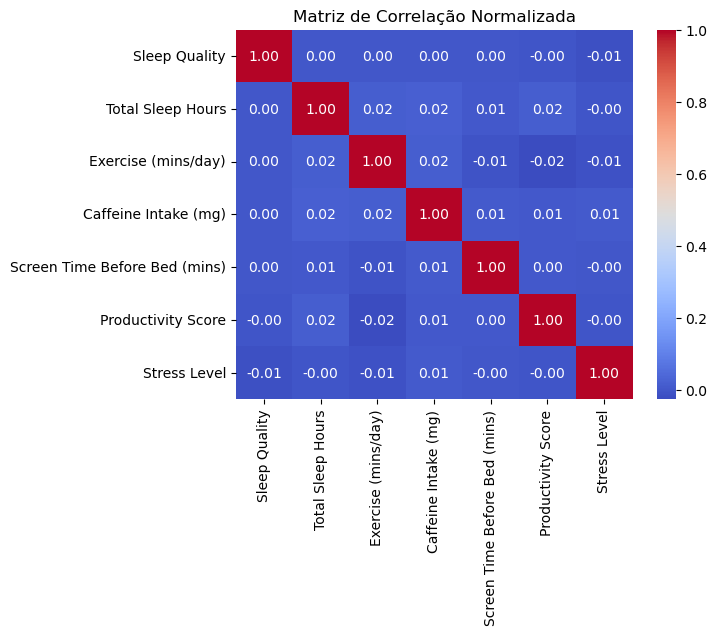

<Figure size 640x480 with 0 Axes>

In [215]:
# tabela
X_normalizado = df_normalizado
display(X_normalizado.corr())

# mapa
#plt.figure(figsize=(8,6))
sns.heatmap(X_normalizado.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação Normalizada")
plt.show()
plt.savefig('correl_matriz_normal.png')

### **2.1.5 Teste de Colinearidade (NORMALIZADO)**
____________________________________
**RESULTADO:** As varíaveis NÃO apresentam colinearidade entre si.

In [53]:
# Adicionar constante
import statsmodels.api as sm
X_normalizado_vif = sm.add_constant(X)

# Calcular VIF
vif_data_normalizado = pd.DataFrame()
vif_data_normalizado["Variável"] = X_normalizado_vif.columns
vif_data_normalizado["VIF"] = [variance_inflation_factor(X_normalizado_vif.values, i) for i in range(X_normalizado_vif.shape[1])]

display(vif_data_normalizado)

,Variável,VIF
0,const,43.326787
1,Sleep Quality,1.000218
2,Total Sleep Hours,1.001130
3,Exercise (mins/day),1.001359
4,Caffeine Intake (mg),1.000830
5,Screen Time Before Bed (mins),1.000168
6,Productivity Score,1.001035
7,Stress Level,1.000460
